In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar librerias y módulos necesarios:
import pandas as pd
import numpy as np
import os
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ruta del directorio que contiene los archivos CSV de la matriculación por provincia
folder_path = "/content/drive/MyDrive/TFM/output_marca_provincia"

# Lista para almacenar todos los DataFrames de cada año
all_data = []

# Bucle para leer y procesar cada archivo CSV:
for year in range(2010, 2025):
    file = f"ventas_provincia_{year}.csv"
    df = pd.read_csv(os.path.join(folder_path, file))
    df['año'] = year
    all_data.append(df)

# Combinar todos los DataFrames en un único DataFrame
df_all = pd.concat(all_data, ignore_index=True)

#Imprimir los años para comprobar si la combinación fue exitosa
print(df_all["año"].unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024]


In [ ]:
from math import comb
# Crear una lista de años desde 2010 a 2024
years = list(range(2010, 2025))

# Obtener las provincias únicas presentes en los datos
provincias = df_all["provincia_id"].unique()

# Obtener las marcas únicas presentes en los datos
marcas = df_all["marca_id"].unique()

# Crear una tabla con todas las combinaciones de años, provincias y marcas
full_index = pd.DataFrame(list(product(years, provincias, marcas)), columns=["año", "provincia_id", "marca_id"])

# Combinar con los datos originales para mantener información relevante
df_full = pd.merge(
    full_index,
    df_all[["año", "provincia_id", "marca_id", "cantidad_total", "marca", "provincia"]],
    how="left",
    on=["año", "provincia_id", "marca_id"]
)

# Rellenar los valores faltantes en " cantidad_total" con 0
df_full["cantidad_total"] = df_full["cantidad_total"].fillna(0)

In [ ]:
# Crear variable de rezago (lag) para la cantidad vendida en años anteriores
# Ventas del año anterior
df_full["lag_1"] = df_full.groupby(["marca_id", "provincia_id"])["cantidad_total"].shift(1)
# Ventas de hace 2 años
df_full["lag_2"] = df_full.groupby(["marca_id", "provincia_id"])["cantidad_total"].shift(2)

# Rellenar los valores NaN con 0
df_full[["lag_1", "lag_2"]] = df_full[["lag_1", "lag_2"]].fillna(0)

In [ ]:
# Mostrar las primeras filas del DataFrame df_full para inspeccionar de los datos
print(df_full.head())

# Mostrar información relevante del DataFrame df_full
print(df_full.info())

    año  provincia_id  marca_id  cantidad_total        marca    provincia  \
0  2010             1         1               0          3a3  araba/álava   
1  2010             1         2               0         a.c.  araba/álava   
2  2010             1         3               0  a.e.m_scout  araba/álava   
3  2010             1         4               0       a.m.c.  araba/álava   
4  2010             1         5               0       abarth  araba/álava   

   lag_1  lag_2  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432120 entries, 0 to 432119
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   año             432120 non-null  int64  
 1   provincia_id    432120 non-null  int64  
 2   marca_id        432120 non-null  int64  
 3   cantidad_total  432120 non-null  int64  
 4   marca           432120 non-null  objec

In [ ]:
# Filtrar el DataFrame para eliminar las marcas "Total" y "All"
df_full = df_full[~df_full['marca'].str.lower().isin(['total', 'all'])]

# Definir el número de marcas a mostrar en el top
top_n = 50

# 1. Agrupar por marca y sumar los registros total
# 2. Ordenar los resultados de mayor a menor
# 3. Seleccionar las top50 marcas
# 4. Obtener los nombres de las marcas en una lista
top_marcas = df_full.groupby('marca')['cantidad_total'].sum().sort_values(ascending=False).head(top_n).index.tolist()

# Mostrar el listado de las top50 marcas:
print("Top50：", top_marcas)

Top50： ['volkswagen', 'peugeot', 'seat', 'renault', 'citroen', 'toyota', 'opel', 'ford', 'mercedes-benz', 'hyundai', 'audi', 'kia', 'nissan', 'dacia', 'bmw', 'fiat', 'skoda', 'mazda', 'volvo', 'mini', 'mitsubishi', 'honda', 'jeep', 'lexus', 'suzuki', 'chevrolet', 'mg', 'cupra', 'alfa_romeo', 'smart', 'tesla', 'ssangyong', 'ds', 'porsche', 'subaru', 'jaguar', 'land_rover', 'lancia', 'infiniti', 'lynk&co', 'omoda', 'byd', 'chrysler', 'maserati', 'dr', 'jimini', 'saab', 'dodge', 'tata', 'ferrari']


In [ ]:
# Filtrar el DataFrame para mantener solo las marcas del Top50
df_top = df_full[df_full["marca"].isin(top_marcas)].copy()

# Diccionario para clasificar las marcas por región
grupo_marca_dict = {
    # Marcas europeas
    "volkswagen": "Europa",
    "peugeot": "Europa",
    "seat": "Europa",
    "renault": "Europa",
    "citroen": "Europa",
    "opel": "Europa",
    'mercedes-benz': "Europa",
    "audi": "Europa",
    "dacia": "Europa",
    "fiat": "Europa",
    "skoda": "Europa",
    "volvo": "Europa",
    "bmw": "Europa",
    "mini": "Europa",
    "cupra": "Europa",
    "alfa_romeo": "Europa",
    "smart": "Europa",
    "ds": "Europa",
    "porsche": "Europa",
    "jaguar": "Europa",
    "land_rover": "Europa",
    "lancia": "Europa",
    "infiniti": "Europa",
    "maserati": "Europa",
    "dr": "Europa",
    "saab": "Europa",
    "ferrari": "Europa",

    # Marcas japoneses
    "toyota": "Japón",
    "nissan": "Japón",
    "mazda": "Japón",
    "mitsubishi": "Japón",
    "honda": "Japón",
    "lexus": "Japón",
    "suzuki": "Japón",
    "jimini": "Japón",
    "subaru": "Japón",

    # Marcas coreanas
    "hyundai": "Corea",
    "kia": "Corea",
    "ssangyong": "Corea",

    # Marcas chinas
    "mg": "China",
    "lynk&co": "China",
    "omoda": "China",
    "byd": "China",

    # Marcas americanas
    "ford": "EEUU",
    "jeep": "EEUU",
    "chevrolet": "EEUU",
    "tesla": "EEUU",
    "chrysler": "EEUU",
    "dodge": "EEUU"
}

# Crear nueva columna con el grupo de cada marca
df_top["grupo_marca"] = df_top["marca"].map(grupo_marca_dict).fillna("Otros")

# Mostrar los resultados
print(df_top["grupo_marca"].value_counts())
print(df_top.head())

grupo_marca
Europa    21060
Japón      7020
EEUU       4680
China      3120
Corea      2340
Otros       780
Name: count, dtype: int64
      año  provincia_id  marca_id  cantidad_total       marca    provincia  \
16   2010             1        17              49  alfa_romeo  araba/álava   
41   2010             1        42             194        audi  araba/álava   
77   2010             1        78             202         bmw  araba/álava   
96   2010             1        97               0         byd  araba/álava   
114  2010             1       115              95   chevrolet  araba/álava   

     lag_1  lag_2 grupo_marca  
16     0.0    0.0      Europa  
41     0.0    0.0      Europa  
77     0.0    0.0      Europa  
96     0.0    0.0       China  
114    0.0    0.0        EEUU  


In [ ]:
# Mostrar información relevante del DataFrame df_top
print(df_top.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39000 entries, 16 to 432100
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   año             39000 non-null  int64  
 1   provincia_id    39000 non-null  int64  
 2   marca_id        39000 non-null  int64  
 3   cantidad_total  39000 non-null  int64  
 4   marca           39000 non-null  object 
 5   provincia       39000 non-null  object 
 6   lag_1           39000 non-null  float64
 7   lag_2           39000 non-null  float64
 8   grupo_marca     39000 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.0+ MB
None


/tmp/ipython-input-10-3446108471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10["año"] = df_top10["año"].astype(int)


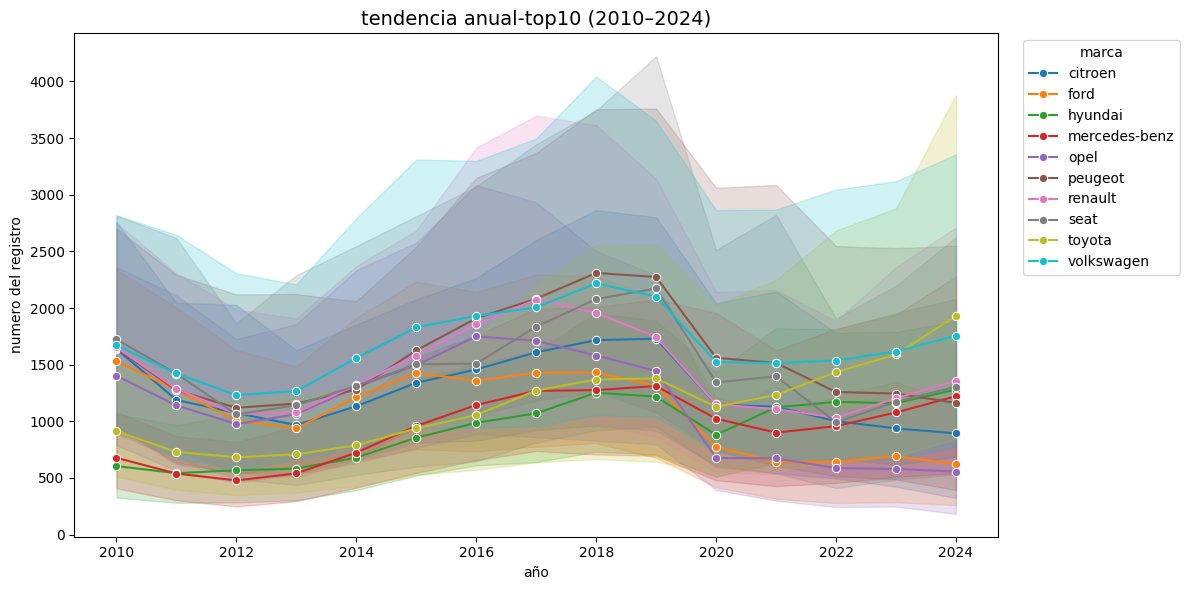

In [ ]:
# Calcular las 10 marcas con mayores ventas totales
top10_brands = (
    df_top.groupby("marca")["cantidad_total"].sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Filtrar el Dataframe para incluir solo las top10 marcas
df_top10 = df_top[df_top["marca"].isin(top10_brands)]
df_top10["año"] = df_top10["año"].astype(int)

# Crear gráfico de líneas de evolución temporal
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top10, x="año", y="cantidad_total", hue="marca", marker="o")
plt.title("tendencia anual-top10 (2010–2024)", fontsize=14)
plt.xlabel("año")
plt.ylabel("numero del registro")
plt.legend(title="marca", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

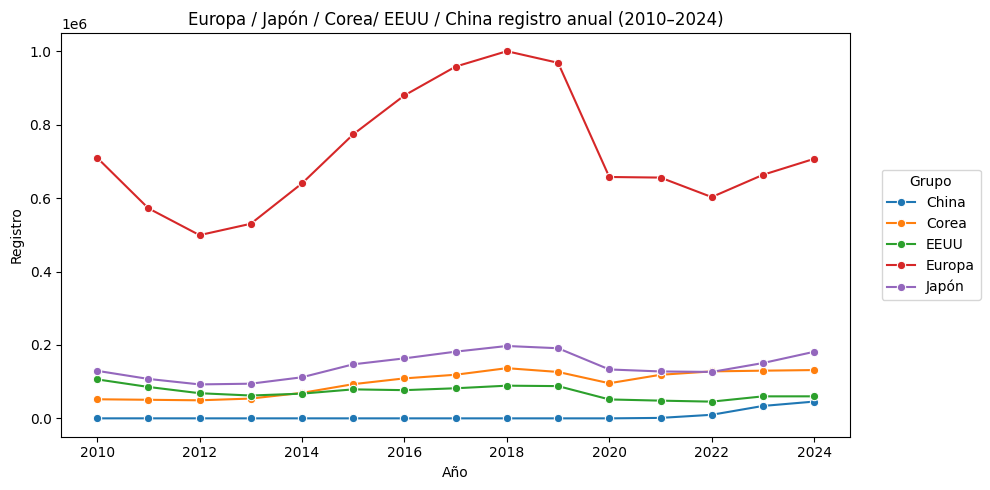

In [ ]:
# Evolución anual de los grupos de marcas
df_group_year = (
    df_top
    .groupby(["año", "grupo_marca"])["cantidad_total"]
    .sum()
    .reset_index()
)

# Filtrar para excluir el grupo "Otros"
df_group_year = df_group_year[df_group_year["grupo_marca"] != "Otros"]

# Visualización
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df_group_year,
    x="año", y="cantidad_total",
    hue="grupo_marca", marker="o"
)
plt.title("Europa / Japón / Corea/ EEUU / China registro anual (2010–2024)")
plt.xlabel("Año"); plt.ylabel("Registro")
plt.legend(title="Grupo", bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.show()

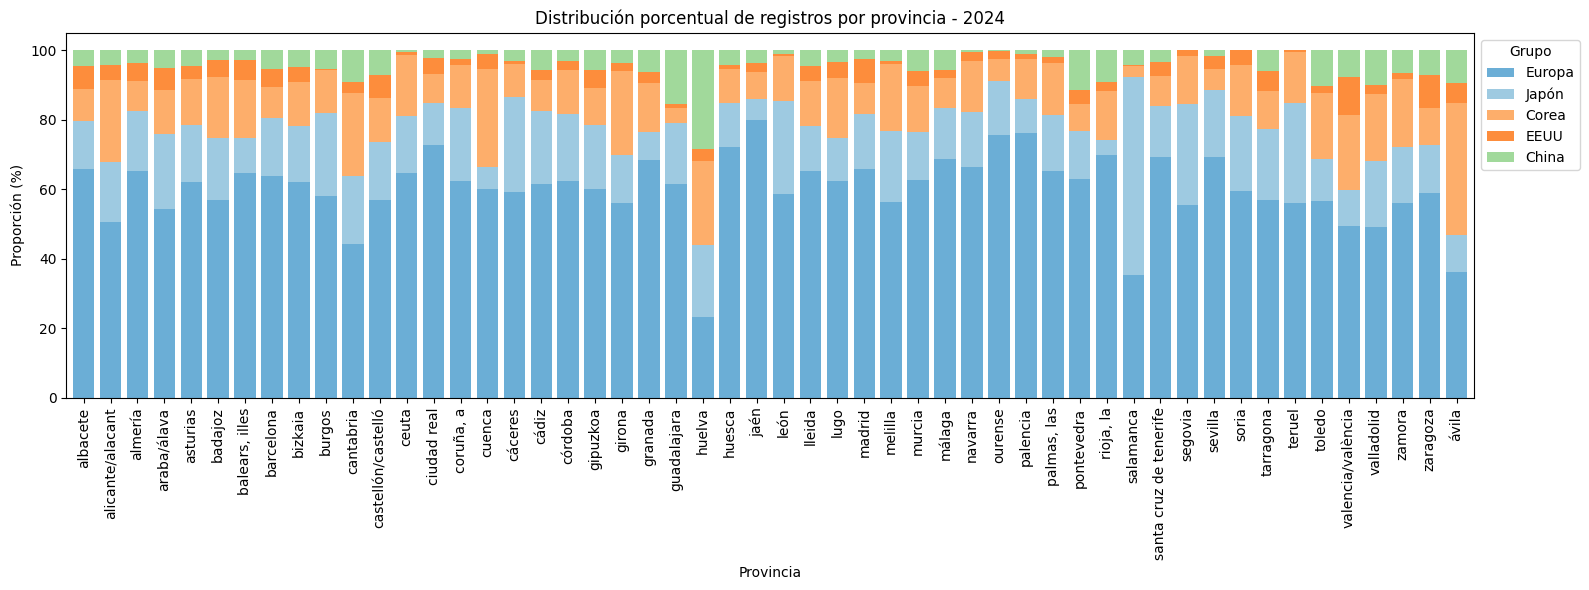

In [ ]:
# Filtrar solo datos de 2024 y crear pivot table por provincia y grupo
df_2024 = df_top[df_top["año"]==2024]
prov_pivot = (
    df_2024
    .groupby(["provincia", "grupo_marca"])["cantidad_total"]
    .sum()
    .unstack(fill_value=0)
)

# Estandarizar orden de columnas
column_order = ["Europa", "Japón", "Corea", "EEUU", "China"]
for col in column_order:
    if col not in prov_pivot.columns:
        prov_pivot[col] = 0
prov_pivot = prov_pivot[column_order]

# 3. Calcular porcentajes por provincia
prov_pivot_percent = prov_pivot.div(prov_pivot.sum(axis=1), axis=0) * 100

# 4. Visualización con gráfico de barras apiladas
colors = [
    "#6baed6",  # Europe
    "#9ecae1",  # Japón
    "#fdae6b",  # Corea
    "#fd8d3c",  # EEUU
    "#a1d99b",  # China
]
prov_pivot_percent.plot(kind='bar', stacked=True, figsize=(16,6), width=0.8, color=colors)

plt.title("Distribución porcentual de registros por provincia - 2024")
plt.ylabel("Proporción (%)")
plt.xlabel("Provincia")
plt.legend(title="Grupo", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

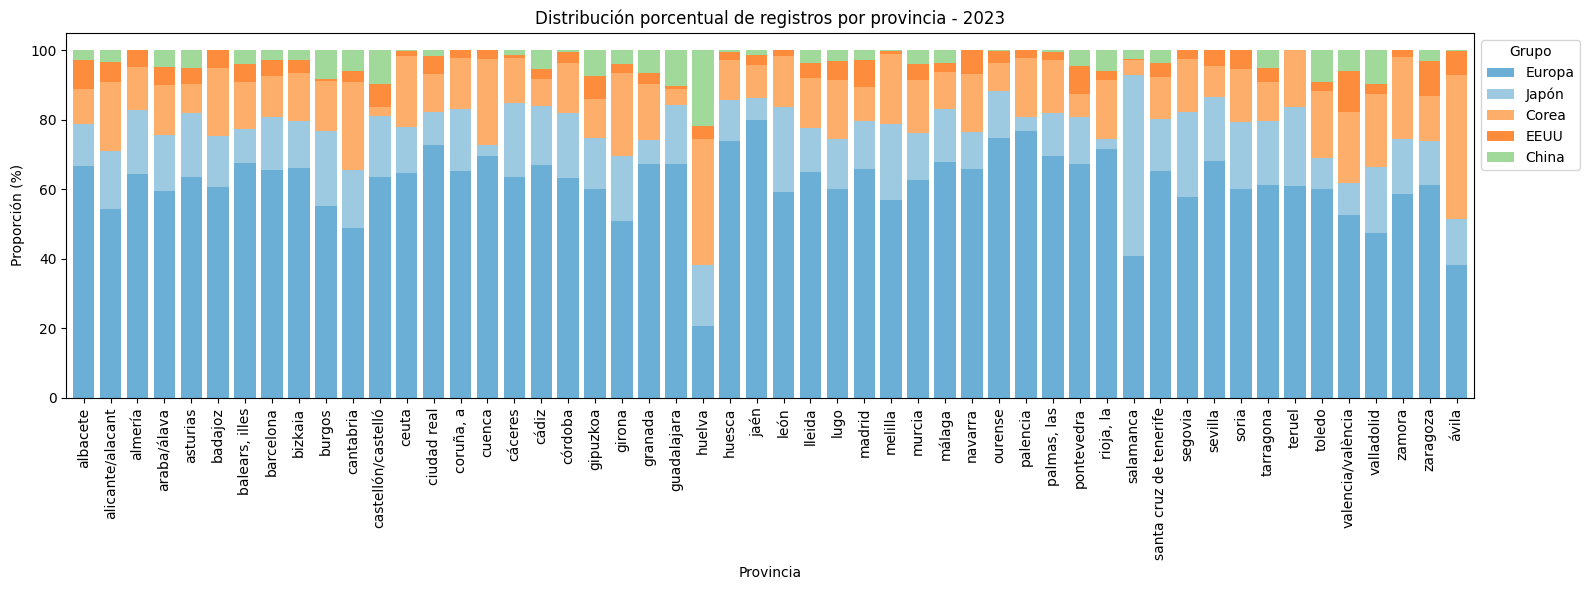

In [ ]:
# Filtrar solo datos de 2023 y crear pivot table por provincia y grupo
df_2024 = df_top[df_top["año"]==2023]
prov_pivot = (
    df_2024
    .groupby(["provincia", "grupo_marca"])["cantidad_total"]
    .sum()
    .unstack(fill_value=0)
)

# Estandarizar orden de columnas
column_order = ["Europa", "Japón", "Corea", "EEUU", "China"]
for col in column_order:
    if col not in prov_pivot.columns:
        prov_pivot[col] = 0
prov_pivot = prov_pivot[column_order]

# 3. Calcular porcentajes por provincia
prov_pivot_percent = prov_pivot.div(prov_pivot.sum(axis=1), axis=0) * 100

# 4. Visualización con gráfico de barras apiladas
colors = [
    "#6baed6",  # Europe
    "#9ecae1",  # Japón
    "#fdae6b",  # Corea
    "#fd8d3c",  # EEUU
    "#a1d99b",  # China
]
prov_pivot_percent.plot(kind='bar', stacked=True, figsize=(16,6), width=0.8, color=colors)

plt.title("Distribución porcentual de registros por provincia - 2023")
plt.ylabel("Proporción (%)")
plt.xlabel("Provincia")
plt.legend(title="Grupo", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

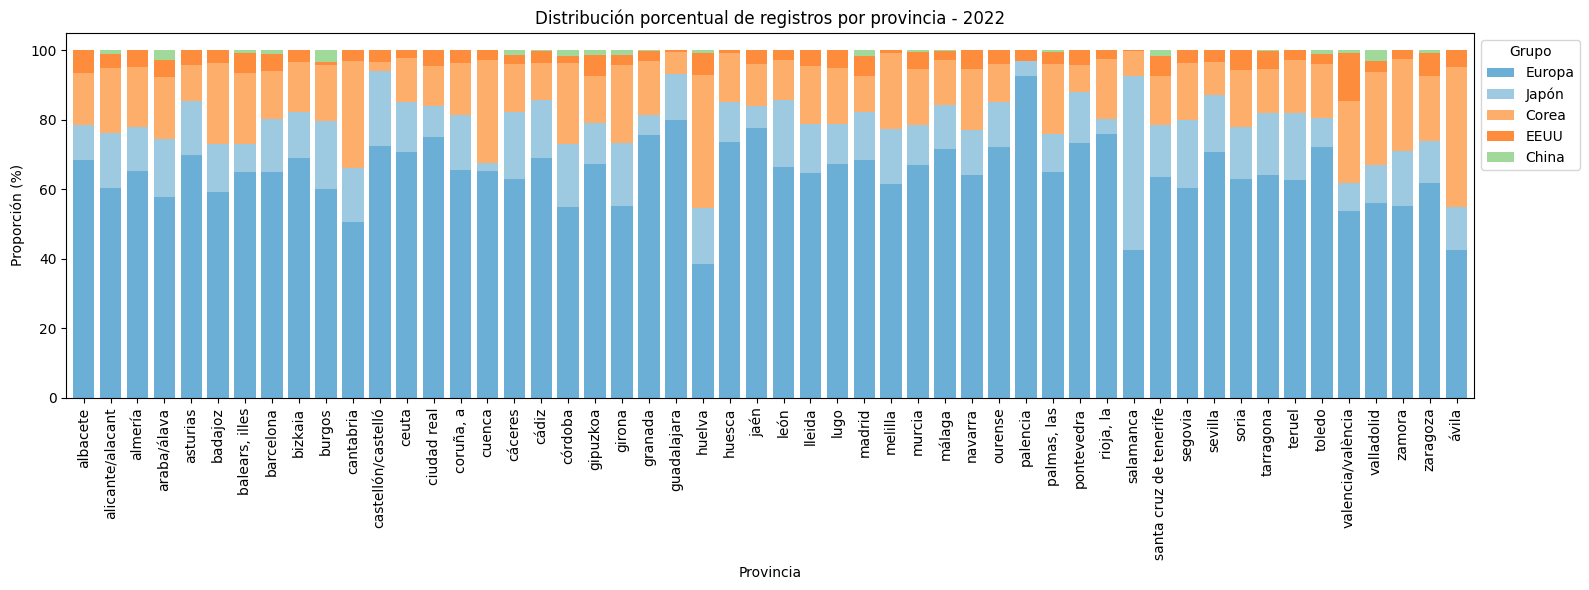

In [ ]:
# Filtrar solo datos de 2022 y crear pivot table por provincia y grupo
df_2024 = df_top[df_top["año"]==2022]
prov_pivot = (
    df_2024
    .groupby(["provincia", "grupo_marca"])["cantidad_total"]
    .sum()
    .unstack(fill_value=0)
)

# Estandarizar orden de columnas
column_order = ["Europa", "Japón", "Corea", "EEUU", "China"]
for col in column_order:
    if col not in prov_pivot.columns:
        prov_pivot[col] = 0
prov_pivot = prov_pivot[column_order]

# 3. Calcular porcentajes por provincia
prov_pivot_percent = prov_pivot.div(prov_pivot.sum(axis=1), axis=0) * 100

# 4. Visualización con gráfico de barras apiladas
colors = [
    "#6baed6",  # Europe
    "#9ecae1",  # Japón
    "#fdae6b",  # Corea
    "#fd8d3c",  # EEUU
    "#a1d99b",  # China
]
prov_pivot_percent.plot(kind='bar', stacked=True, figsize=(16,6), width=0.8, color=colors)

plt.title("Distribución porcentual de registros por provincia - 2022")
plt.ylabel("Proporción (%)")
plt.xlabel("Provincia")
plt.legend(title="Grupo", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [ ]:
# Importar librerias necesarias para machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Copiar el DataFrame original para no perder los cambios
df = df_top.copy()

# Codificación de variables categóricas
le_prov = LabelEncoder()
df["prov_code"] = le_prov.fit_transform(df["provincia_id"])

le_marca = LabelEncoder()
df["marca_code"] = le_marca.fit_transform(df["marca_id"])

le_group = LabelEncoder()
df["group_code"] = le_group.fit_transform(df["grupo_marca"])

# Definición de features y target
features = ["año", "lag_1", "lag_2", "prov_code", "marca_code", "group_code"]
target = "cantidad_total"

# Ordenar Dataframe por año
df = df.sort_values("año")

# Dividir los datos en conjuntos de entrenamiento y validación
train = df[df["año"] < 2024]
val = df[df["año"] == 2024]

X_train, y_train = train[features], train[target]
X_val, y_val = val[features],   val[target]

# Función de evaluación SMAPE (Error Porcentual Absoluto Medio Simétrico)
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-9))

In [ ]:
# Configurar los hiperparámetros de LightGBM
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

# Configuración de GridSearch
lgbm = LGBMRegressor(random_state=42)

grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error",
                           n_jobs=-1,
                           verbose=2)

# Entrenamiento y opimización
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("\n ========Mejor combinación de hiperparámetros:======== \n", grid_search.best_params_)

# Modelo óptimo entrenado
best_lgbm = grid_search.best_estimator_

# Predicciones en el conjunto de validación
y_pred_lgbm = best_lgbm.predict(X_val)

# Cálculo de métricas
mae_lgbm = mean_absolute_error(y_val, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, y_pred_lgbm))
smape_lgbm = smape(y_val.values, y_pred_lgbm)
r2_lgbm = r2_score(y_val, y_pred_lgbm)

# Mostrar los resultados
print("\n")
print("========LightGBM:========")
print(f"MAE: {mae_lgbm:.2f}")
print(f"RMSE: {rmse_lgbm:.2f}")
print(f"SMAPE: {smape_lgbm:.2f}%")
print(f"R²: {r2_lgbm:.3f}")

# Mostrar la importancia de las variables
importances_lgbm = pd.Series(best_lgbm.feature_importances_, index=features).sort_values(ascending=False)
print("\n")
print("========Importancia de las variables:========\n",importances_lgbm)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 36400, number of used features: 6
[LightGBM] [Info] Start training from score 397.219670

 ========Mejor combinación de hiperparámetros:======== 
 {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 200, 'subsample': 0.7}


========LightGBM:========
MAE: 105.73
RMSE: 439.43
SMAPE: 80.40%
R²: 0.956


========Importancia de las variables:========
 marca_code    1456
lag_1         1262
año           1189
lag_2         1035
prov_code      886
group_code     172
dtype: int32


In [ ]:
# Configurar los hiperparámetros de XGBoost
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

# Configuración de GridSearch
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error",
                           n_jobs=-1,
                           verbose=2)

# Entrenamiento y opimización
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("\n ========Mejor combinación de hiperparámetros:======== \n", grid_search.best_params_)

# Modelo óptimo entrenado
best_xgb = grid_search.best_estimator_

# Predicciones en el conjunto de validación
y_pred_xgb = best_xgb.predict(X_val)

# Cálculo de métrica
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
smape_xgb = smape(y_val.values, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Mostrar los resultados
print("\n")
print("======== XGBoost: ========:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"SMAPE: {smape_xgb:.2f}%")
print(f"R²: {r2_xgb:.3f}")

# Mostrar la importancia de las variables
importances_xgb = pd.Series(best_xgb.feature_importances_, index=features).sort_values(ascending=False)
print("\n")
print("======== Importancia de las variable: ======== \n",importances_xgb)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 ========Mejor combinación de hiperparámetros:======== 
 {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


======== XGBoost: ========:
MAE: 106.23
RMSE: 453.21
SMAPE: 85.45%
R²: 0.953


======== Importancia de las variable: ======== 
 lag_1         0.871975
lag_2         0.041106
año           0.033973
marca_code    0.023525
prov_code     0.023357
group_code    0.006064
dtype: float32


In [ ]:
# Entrenamiento del modelo Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones para 2024
y_pred_lr = lr.predict(X_val)

# Cálculo de métricas
mae_lr = mean_absolute_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
smape_lr = smape(y_val.values, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

# Resultado
print(f"======== Linear Regression: ========")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"SMAPE: {smape_lr:.2f}%")
print(f"R²: {r2_lr:.3f}")

# Análisis de importancia de variables
importances_lr = pd.Series(lr.coef_, index=features).sort_values(key=abs, ascending=False)
print("\n")
print("======== Importancia de las variable: ======== \n", importances_lr)

======== Linear Regression: ========
MAE: 129.74
RMSE: 396.29
SMAPE: 138.80%
R²: 0.964


======== Importancia de las variable: ======== 
 año          -11.606365
lag_1          0.947053
group_code    -0.716885
marca_code     0.418850
prov_code     -0.225232
lag_2          0.044023
dtype: float64


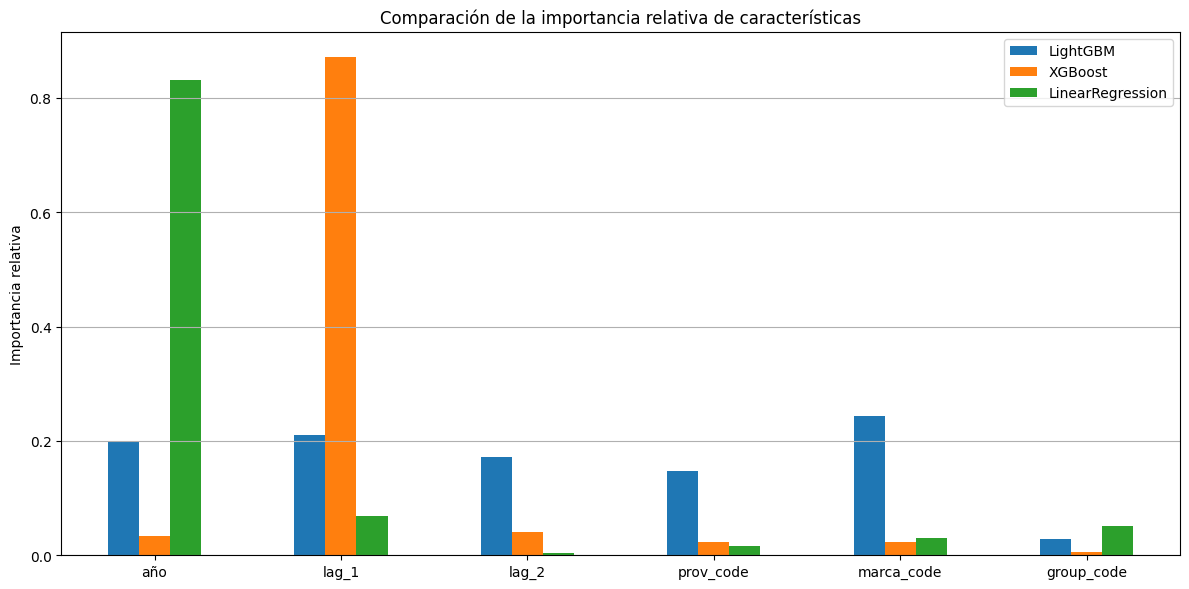

In [ ]:
# Calcular la importancia de características del modelo LightGBM y la normalizarla
importances_lgbm = pd.Series(best_lgbm.feature_importances_, index=features)
importances_lgbm_norm = importances_lgbm / importances_lgbm.sum()

# Calcular la importancia de características del modelo LightGBM y la normalizarla
importances_xgb = pd.Series(best_xgb.feature_importances_, index=features)
importances_xgb_norm = importances_xgb / importances_xgb.sum()

# Coeficientes de regresión lineal normalizados por valor absoluto
importances_lr = pd.Series(lr.coef_, index=features)
importances_lr_norm = importances_lr.abs() / importances_lr.abs().sum()

# Combinar datos para facilitar la visualización
df_importances = pd.DataFrame({
    "LightGBM": importances_lgbm_norm,
    "XGBoost": importances_xgb_norm,
    "LinearRegression": importances_lr_norm
})

# Crear un gráfico de barras que muestra las importancias relativas de cada característica en los tres modelos
df_importances.plot(kind="bar", figsize=(12,6), rot=0)
plt.ylabel("Importancia relativa")
plt.title("Comparación de la importancia relativa de características")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Copiar el DataFrame original para no perder los cambios
df = df_top.copy()

# Iniciar el codificador de etiquetas
le_prov = LabelEncoder().fit(df["provincia_id"])
le_marca = LabelEncoder().fit(df["marca_id"])
le_group = LabelEncoder().fit(df["grupo_marca"])

# Aplicar la transformación a los datos
df["prov_code"] = le_prov.transform(df["provincia_id"])
df["marca_code"] = le_marca.transform(df["marca_id"])
df["group_code"] = le_group.transform(df["grupo_marca"])

# Definir las valiables predictoras y la variable objetivo
features = ["año", "lag_1", "lag_2", "prov_code", "marca_code", "group_code"]
target = "cantidad_total"

# Preparar el conjunto de entrenamiento
train = df[df["año"] <= 2024]
X_train, y_train = train[features], train[target]

In [ ]:
# Iniciar el modelo LightGBM con paralelismo
model = LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    colsample_bytree=1,
    learning_rate=0.2,
    max_depth=15,
    n_estimators=200,
    subsample=0.7
)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Preparar el conjunto de predicción
predict_frames = []

# Usar el último año (2024) como punto de partida
last_frame = df[df['año'] == 2024].copy()

# Realizar prediiciones para 2025-2027
for year in [2025, 2026, 2027]:
    new_pred = last_frame.copy()
    new_pred["año"] = year
    new_pred["lag_2"] = new_pred["lag_1"]
    new_pred["lag_1"] = new_pred["cantidad_total"]
    X_new = new_pred[features]
    pred = model.predict(X_new)
    new_pred["cantidad_total"] = pred.round().astype(int)
    predict_frames.append(new_pred)
    last_frame = new_pred.copy()

# Combinar datos históricos con predicciones
df_result = pd.concat([df] + predict_frames, ignore_index=True)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 39000, number of used features: 6
[LightGBM] [Info] Start training from score 399.608103


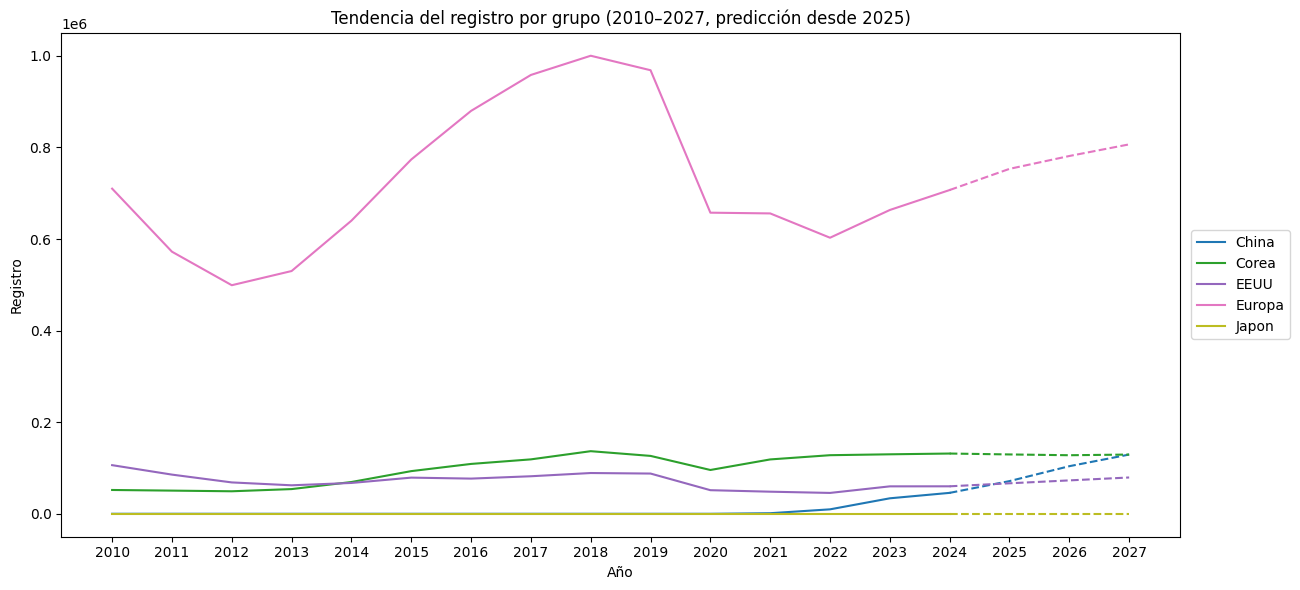

In [ ]:
# Agrupar datos por año y grupo de marca
df_group = (df_result.groupby(["año", "grupo_marca"])["cantidad_total"].sum().reset_index())

# Filtrar para excluir el grupo "Otros"
df_group = df_group[
    (df_group["grupo_marca"] != "Otros") &
    (df_group["grupo_marca"].isin(["China", "Corea", "EEUU", "Europa", "Japon"]))
]

# Crear un índice completo para aseguarar todos los años-grupos
all_years = sorted(df_group['año'].unique())
all_groups = ["China", "Corea", "EEUU", "Europa", "Japon"]
idx = pd.MultiIndex.from_product([all_years, all_groups], names=["año", "grupo_marca"])

# Rellenar los valores faltantes con 0
df_group_full = df_group.set_index(["año", "grupo_marca"]).reindex(idx, fill_value=0).reset_index()

# Paleta de colores para cada grupo de marca
color_dict = {
    "China": "#1f77b4",
    "Corea": "#2ca02c",
    "EEUU": "#9467bd",
    "Europa": "#e377c2",
    "Japon": "#bcbd22",
}

# Visualización
plt.figure(figsize=(12, 6))
plt.xticks(all_years)

for grupo in all_groups:
    data = df_group_full[df_group_full['grupo_marca'] == grupo].sort_values('año')
    years = data['año'].values
    values = data['cantidad_total'].values
    is_pred = years >= 2025

    # Linea sólida para datos históricos
    plt.plot(years[~is_pred], values[~is_pred], color=color_dict[grupo], label=grupo)
    #Linea discontinua para predicciones
    if is_pred.sum() > 0:
        start_pred = np.where(is_pred)[0][0] - 1
        plt.plot(years[start_pred:], values[start_pred:], '--', color=color_dict[grupo])

plt.title("Tendencia del registro por grupo (2010–2027, predicción desde 2025)")
plt.xlabel("Año")
plt.ylabel("Registro")
plt.xticks(all_years)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas (Label Encoding): Convertir variables categóricas a numéricas para el modelo
df = df_top.copy()
le_prov = LabelEncoder().fit(df["provincia_id"])
le_marca = LabelEncoder().fit(df["marca_id"])
le_group = LabelEncoder().fit(df["grupo_marca"])
df["prov_code"] = le_prov.transform(df["provincia_id"])
df["marca_code"] = le_marca.transform(df["marca_id"])
df["group_code"] = le_group.transform(df["grupo_marca"])

# Definir características (features) y variable objetivo (target)
features = ["año", "lag_1", "lag_2", "prov_code", "marca_code", "group_code"]
target = "cantidad_total"

# Entrenamiento del modelo
# Preparar datos de entrenamiento (hasta 2024)
train = df[df["año"] <= 2024]
X_train, y_train = train[features], train[target]

# Configurar y entrenar modelo LightGBM
model = LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    colsample_bytree=1,
    learning_rate=0.2,
    max_depth=15,
    n_estimators=200,
    subsample=0.7
)
model.fit(X_train, y_train)

# Predicción anual iterativa (Rolling Prediction)
predict_frames = []
last_frame = df[df["año"] == 2024].copy()
for year in [2025, 2026, 2027]:
    new_pred = last_frame.copy()
    new_pred["año"] = year
    new_pred["lag_2"] = new_pred["lag_1"]
    new_pred["lag_1"] = new_pred["cantidad_total"]
    X_new = new_pred[features]
    pred = model.predict(X_new)
    new_pred["cantidad_total"] = pred.round().astype(int)
    predict_frames.append(new_pred)
    last_frame = new_pred.copy()

# Combinar datos históricos y predicciones
df_result = pd.concat([df] + predict_frames, ignore_index=True)

# Filtrar solo marcas chinas
df_china = df_result[df_result["grupo_marca"] == "China"]
df_total = (
    df_result
    .groupby(["año", "provincia"])["cantidad_total"]
    .sum()
    .reset_index()
    .rename(columns={"cantidad_total": "total_registro"})
)

# Calcular totales por provincia y año
df_china_prov = (
    df_china
    .groupby(["año", "provincia"])["cantidad_total"]
    .sum()
    .reset_index()
    .rename(columns={"cantidad_total": "china_registro"})
)

df_map = df_china_prov.merge(df_total, on=["año", "provincia"])
df_map["china_ratio"] = (df_map["china_registro"] / df_map["total_registro"]).replace(np.inf, 0)
df_map["china_ratio_pct"] = (df_map["china_ratio"] * 100).round(2)

# Exportar solo años de predicción (2025-2027) para crear mapas de datos en Tableau
df_map_pred = df_map[df_map["año"].isin([2025, 2026, 2027])]
df_map_pred.to_csv("china_province_pred_2025_2027.csv", index=False, encoding="utf-8-sig")
print("china_province_pred_2025_2027.csv está guardado")

# Mostrar vista previa de los datos
print(df_map_pred.head())